# Đây là file nháp để thực hiện vẽ bản đồ thành phố Hà nội

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from unidecode import unidecode

In [2]:
# Đọc shapefile chưa dữ liệu tọa độ của Việt Nam, lưu ý giữ nguyên thư mục diaphanhuyen mới hiện toàn bộ thông tin cần thiết
gdf = gpd.read_file('diaphanhuyen\Dia_phan_Huyen.shp')

In [3]:
gdf = gdf[gdf['Ten_Tinh'] == 'Hà Nội']

In [4]:
# Giữ cột chứa tên quận/huyện và tọa độ, thay đổi tên cột
gdf = gdf[['Ten_Huyen', 'geometry']]
gdf = gdf.rename(columns={'Ten_Huyen': 'Quận'})
gdf

,Quận,geometry
415,Ba Dinh,"POLYGON ((105.83844 21.05651, 105.84544 21.054..."
416,Cau Giay,"POLYGON ((105.80648 21.04909, 105.80526 21.049..."
419,Long Bien,"POLYGON ((105.84409 21.08138, 105.84501 21.081..."
422,Hoai Duc,"POLYGON ((105.69299 21.08890, 105.69663 21.086..."
424,Tay Ho,"POLYGON ((105.81210 21.10103, 105.81799 21.098..."
425,Thach That,"POLYGON ((105.56924 21.09892, 105.57018 21.098..."
427,Tu Liem,"POLYGON ((105.73040 21.11217, 105.74051 21.103..."
428,Gia Lam,"POLYGON ((105.91323 21.12309, 105.91990 21.122..."
432,Dan Phuong,"POLYGON ((105.65003 21.15468, 105.66039 21.152..."
434,Phuc Tho,"POLYGON ((105.60475 21.16508, 105.60633 21.164..."


In [5]:
# Các giá trị của tên quận không có dấu
gdf['Quận'].unique()

array(['Ba Dinh', 'Cau Giay', 'Long Bien', 'Hoai Duc', 'Tay Ho',
       'Thach That', 'Tu Liem', 'Gia Lam', 'Dan Phuong', 'Phuc Tho',
       'Son Tay', 'Dong Anh', 'Phu Xuyen', 'Ung Hoa', 'My Duc',
       'Thuong Tin', 'Thanh Oai', 'Chuong My', 'Thanh Tri', 'Ha Dong',
       'Hoang Mai', 'Thanh Xuan', 'Hai Ba Trung', 'Dong Da', 'Hoan Kiem',
       'Quoc Oai', 'Me Linh', 'Ba Vi', 'Soc Son'], dtype=object)

In [6]:
len(gdf)

29

In [7]:
gdf.to_file('geo_hanoi_map.geojson', driver='GeoJSON')

# Tiến hành thay đổi tên trong cột Quận của bộ dữ liệu mình đang xét để có thể merge với bộ dữ liệu tọa độ

In [8]:
data = pd.read_csv('../dataset/house_preprocessing_for_dashboard.csv', index_col=0)

In [9]:
data['Quận'].unique()

array(['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
       'Quận Tây Hồ', 'Quận Đống Đa', 'Quận Hà Đông', 'Huyện Thanh Trì',
       'Quận Hoàng Mai', 'Quận Long Biên', 'Quận Hoàn Kiếm',
       'Quận Nam Từ Liêm', 'Quận Ba Đình', 'Huyện Hoài Đức',
       'Quận Bắc Từ Liêm', 'Huyện Đan Phượng', 'Huyện Thanh Oai',
       'Huyện Sóc Sơn', 'Huyện Gia Lâm', 'Huyện Chương Mỹ',
       'Huyện Đông Anh', 'Thị xã Sơn Tây', 'Huyện Thường Tín',
       'Huyện Mê Linh', 'Huyện Quốc Oai', 'Huyện Phú Xuyên',
       'Huyện Thạch Thất', 'Huyện Mỹ Đức', 'Huyện Ba Vì',
       'Huyện Phúc Thọ'], dtype=object)

In [10]:
len(data['Quận'].unique())

29

In [11]:
data['Quận'] = data['Quận'].fillna('').apply(lambda x: x.replace('Quận ', '').replace('Huyện ', '').replace('Thị xã ', ''))
data['Quận'] = data['Quận'].replace(['Nam Từ Liêm', 'Bắc Từ Liêm'], 'Từ Liêm')
data['Quận'] = data['Quận'].apply(unidecode)
data.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích (m2),Dài (m),Rộng (m),Giá/m2 (triệu),Dáng nhà
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cau Giay,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,"(0, 4]","(4, 6]","(42, 64]",NaN,NaN,86.96,Dài < Rộng
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuan,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không có,NaN,"(2, 4]","(31, 42]",NaN,NaN,116.22,Dài < Rộng
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Ba Trung,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,"(0, 4]","(2, 4]","(31, 42]",10.00,4.0,65.00,Dài > Rộng
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Tay Ho,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,"(4, 6]","(42, 64]",12.75,4.0,100.00,Dài > Rộng
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuan,Phường Kim Giang,"Nhà ngõ, hẻm",Không có,NaN,"(2, 4]","(31, 42]",9.00,4.0,86.11,Dài > Rộng


In [12]:
# Tính giá nhà trung bình theo từng quận
avg_by_quan = data.groupby('Quận')['Giá/m2 (triệu)'].mean().reset_index()
avg_by_quan

,Quận,Giá/m2 (triệu)
0,Ba Dinh,100.108620
1,Ba Vi,24.172000
2,Cau Giay,102.607920
3,Chuong My,32.214545
4,Dan Phuong,46.492000
5,Dong Anh,40.325174
6,Dong Da,99.216586
7,Gia Lam,60.026220
8,Ha Dong,77.372422
9,Hai Ba Trung,90.470501


In [13]:
# Thêm tọa vào avg_by_quan
avg_by_quan = avg_by_quan.merge(gdf, on='Quận', how='left')
avg_by_quan

,Quận,Giá/m2 (triệu),geometry
0,Ba Dinh,100.108620,"POLYGON ((105.83844 21.05651, 105.84544 21.054..."
1,Ba Vi,24.172000,"POLYGON ((105.42320 21.28991, 105.43024 21.283..."
2,Cau Giay,102.607920,"POLYGON ((105.80648 21.04909, 105.80526 21.049..."
3,Chuong My,32.214545,"POLYGON ((105.69211 20.95937, 105.69213 20.958..."
4,Dan Phuong,46.492000,"POLYGON ((105.65003 21.15468, 105.66039 21.152..."
5,Dong Anh,40.325174,"POLYGON ((105.87070 21.20770, 105.87097 21.207..."
6,Dong Da,99.216586,"POLYGON ((105.83157 21.03140, 105.83820 21.030..."
7,Gia Lam,60.026220,"POLYGON ((105.91323 21.12309, 105.91990 21.122..."
8,Ha Dong,77.372422,"POLYGON ((105.73860 20.99242, 105.74547 20.992..."
9,Hai Ba Trung,90.470501,"POLYGON ((105.86997 21.01682, 105.87814 21.009..."


In [14]:
# Chuyển đổi từ PandasDataFrame thành GeoDataFrame và chỉ giữ lại giá và tọa độ
avg_by_quan = gpd.GeoDataFrame(avg_by_quan[['Giá/m2 (triệu)', 'geometry']])
avg_by_quan

,Giá/m2 (triệu),geometry
0,100.108620,"POLYGON ((105.83844 21.05651, 105.84544 21.054..."
1,24.172000,"POLYGON ((105.42320 21.28991, 105.43024 21.283..."
2,102.607920,"POLYGON ((105.80648 21.04909, 105.80526 21.049..."
3,32.214545,"POLYGON ((105.69211 20.95937, 105.69213 20.958..."
4,46.492000,"POLYGON ((105.65003 21.15468, 105.66039 21.152..."
5,40.325174,"POLYGON ((105.87070 21.20770, 105.87097 21.207..."
6,99.216586,"POLYGON ((105.83157 21.03140, 105.83820 21.030..."
7,60.026220,"POLYGON ((105.91323 21.12309, 105.91990 21.122..."
8,77.372422,"POLYGON ((105.73860 20.99242, 105.74547 20.992..."
9,90.470501,"POLYGON ((105.86997 21.01682, 105.87814 21.009..."


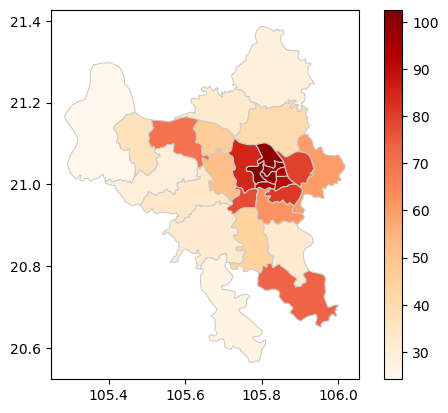

In [15]:
# Tiến hành vẽ bản đồ thành phố hà nội
avg_by_quan.plot(column='Giá/m2 (triệu)', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True)
plt.show()